In [3]:
#Import numpy for arrays
import numpy as np
#Import matplotlib.pyplot for plotting
import matplotlib.pyplot as plt
#Import Landlab raster arrays
from landlab import RasterModelGrid 
from landlab.components import ExponentialWeatherer
from landlab.components import DepthDependentTaylorDiffuser
#Import landlab graph plotting
from landlab.plot.graph import plot_graph
from landlab import imshowhs_grid, imshow_grid

In [4]:
#define the grid
size_x = 100
size_y = 200
spacing = 1.0
grid = RasterModelGrid((size_y, size_x), xy_spacing=spacing)

# morph the grid with a sine function
ice_height = 10
bedrock_slope = 0.22
soil_thickness = 5
moraine_disappears_at_y = 100

# add the topography    
z_ice = grid.add_zeros('ice__elevation', at='node')
z_soil = grid.add_zeros('soil__depth', at='node')
z_bed = grid.add_zeros('bedrock__elevation', at='node')
grid.add_zeros('topographic__elevation', at='node')

#base_soil_depth = 1  # meters
#grid.at_node["soil__depth"][:] = soil_thickness

x = grid.x_of_node
y = grid.y_of_node

# setting ice elevation respected to the base elevation
z = ice_height * np.sin(np.pi*x / (size_x/3)) 
# get z where y is less than moraine_disappears_at_y
z[y<moraine_disappears_at_y] += (y[y<moraine_disappears_at_y] - moraine_disappears_at_y) * ice_height/moraine_disappears_at_y
z[z<0] = 0 # cut the sine function at 0

z_ice += z
z_soil += soil_thickness
z_bed += bedrock_slope * y

# reassign the values to the grid just to be sure
grid.at_node['ice__elevation'] = z_ice
grid.at_node['soil__depth'][:] = z_soil
grid.at_node['bedrock__elevation'] = z_bed + grid.at_node['ice__elevation']
grid.at_node['topographic__elevation'][:] = grid.at_node['bedrock__elevation'] + grid.at_node['soil__depth']
# grid.imshow(elev)

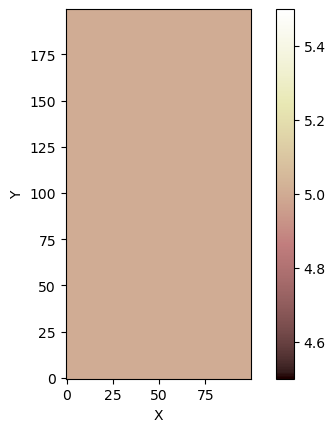

In [5]:
grid.imshow(grid.at_node['soil__depth'])

In [6]:
soil_production = grid.add_zeros('soil_production__rate', at = 'node', clobber=True)
DDdiff = DepthDependentTaylorDiffuser(grid, if_unstable="warn", dynamic_dt=True)
DDdiff.run_one_step(1)

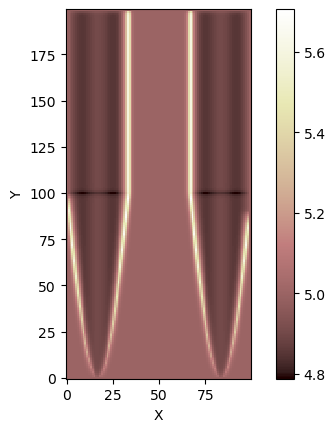

In [7]:
grid.imshow(grid.at_node['soil__depth'])